In [3]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wavelength_nm = 800  # [nm]
STOP = np.inf
R = 146*1e-9
dist = 20*1e-9
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0.5

print(dipoles.initial_field(wavelength_nm, angle, 1, eps_Au, point, phase, a))
p, m = dipoles.calc_dipoles(wavelength_nm, eps_Au, STOP, R , eps_Si, point , angle, amplitude=1, phase=phase, a=a )
print(p)

print(m)

wl = np.linspace(600, 1200, 30)

Px=[]
Py=[]
Pz=[]
Mx=[]
My=[]
Mz=[]

# res = np.empty((3,len(wl)))
for i in tqdm(range(len(wl))):

    p,m = dipoles.calc_dipoles(wl[i], eps_Au, STOP, R , eps_Si, point , angle, amplitude=1, phase=phase, a=a)
    Px.append(p[0])
    Py.append(p[1])
    Pz.append(p[2])
    Mx.append(m[0])
    My.append(m[1])
    Mz.append(m[2])

  

(array([[0.27747304-1.22425j   ],
       [0.25039754-1.35334001j],
       [0.0973912 +0.01790005j]]), array([[ 0.00068853+0.00010798j],
       [-0.0006117 -0.00011243j],
       [ 0.0002809 -0.00151818j]]))
[[2.94489966e-31-1.28411220e-31j]
 [3.16487332e-31-1.53208085e-31j]
 [8.19977890e-33+1.46991770e-32j]]
[[-2.29407153e-23-4.72944398e-24j]
 [ 2.08172812e-23+5.52450546e-24j]
 [ 1.89577686e-23-1.56768571e-23j]]


  0%|          | 0/30 [00:00<?, ?it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\green_func.py:23: RuntimeWarning: divide by zero encountered in divide
  return kr*IntegrandE/kz*np.exp(2*1j*kz*z0), kr*IntegrandH/kz*np.exp(2*1j*kz*z0)
c:\Users\borod\Desktop\SPP_ANALYTICAL\green_func.py:23: RuntimeWarning: invalid value encountered in divide
  return kr*IntegrandE/kz*np.exp(2*1j*kz*z0), kr*IntegrandH/kz*np.exp(2*1j*kz*z0)
c:\Users\borod\Desktop\SPP_ANALYTICAL\green_func.py:23: RuntimeWarning: invalid value encountered in multiply
  return kr*IntegrandE/kz*np.exp(2*1j*kz*z0), kr*IntegrandH/kz*np.exp(2*1j*kz*z0)
100%|██████████| 30/30 [01:22<00:00,  2.76s/it]


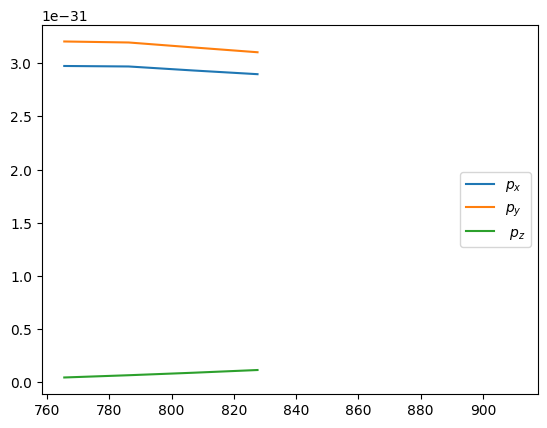

In [4]:
plt.plot(wl, np.real(Px), label='$p_x$')  
plt.plot(wl, np.real(Py), label='$p_y$')  
plt.plot(wl, np.real(Pz), label =' $p_z$')  
plt.legend()

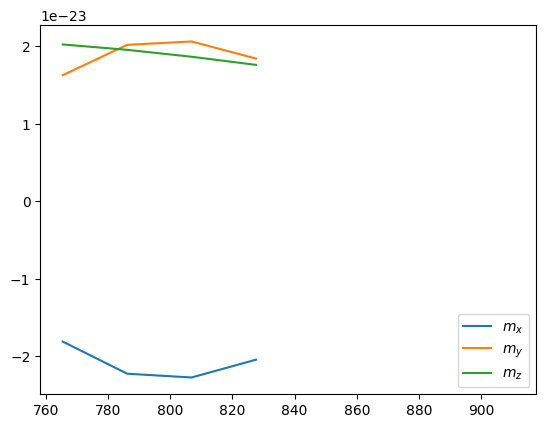

In [5]:
plt.plot(wl, np.real(Mx), label='$m_x$')  
plt.plot(wl, np.real(My), label='$m_y$')  
plt.plot(wl, np.real(Mz), label='$m_z$')  
plt.legend()